In [1]:
"""
This notebook includes visualisation of the final results
No t-tests used since the evaluation is executed for many iterations
and the variance in results was nill.
"""

import pandas as pd
import numpy as np

def parseFile(filename):
    with open(filename,'r') as f:
        all=[]
        for data in f:
            line = data.split(',')
            parallel_modelid=line[0].strip()
            downstream_model=line[1].strip()
            reps_illicitf1_mean=line[2]
            reps_illicitf1_std=line[3]
            reps_accuracy_mean=line[4]
            reps_accuracy_std=line[5]
            reps_precision_mean=line[6]
            reps_precision_std=line[7]
            reps_recall_mean=line[8]
            reps_recall_std=line[9]

            orig_illicitf1_mean=line[10]
            orig_illicitf1_std=line[11]
            orig_accuracy_mean=line[12]
            orig_accuracy_std=line[13]
            orig_precision_mean=line[14]
            orig_precision_std=line[15]
            orig_recall_mean=line[16]
            orig_recall_std=line[17]
            all.append([parallel_modelid,downstream_model,reps_illicitf1_mean,reps_illicitf1_std,reps_accuracy_mean,reps_accuracy_std,reps_precision_mean,reps_precision_std,
                        reps_recall_mean,reps_recall_std,orig_illicitf1_mean,orig_illicitf1_std,orig_accuracy_mean,orig_accuracy_std,orig_precision_mean,orig_precision_std,
                        orig_recall_mean,orig_recall_std])
        return all
    

df = pd.DataFrame(parseFile('.\\data\\result\\EllipticEvaluationResults.txt'))




colnames=['parallel_modelid','downstream_model','reps_illicitf1_mean','reps_illicitf1_std','reps_accuracy_mean','reps_accuracy_std','reps_precision_mean','reps_precision_std',
'reps_recall_mean','reps_recall_std','orig_illicitf1_mean','orig_illicitf1_std','orig_accuracy_mean','orig_accuracy_std','orig_precision_mean','orig_precision_std',
'orig_recall_mean','orig_recall_std']

df.columns=colnames






In [2]:
# get all columns except the one with the date type
cols = df.columns.difference(['parallel_modelid','downstream_model'])
# convert the relevant columns
df[cols] = df[cols].astype(float)

In [3]:
df

,parallel_modelid,downstream_model,reps_illicitf1_mean,reps_illicitf1_std,reps_accuracy_mean,reps_accuracy_std,reps_precision_mean,reps_precision_std,reps_recall_mean,reps_recall_std,orig_illicitf1_mean,orig_illicitf1_std,orig_accuracy_mean,orig_accuracy_std,orig_precision_mean,orig_precision_std,orig_recall_mean,orig_recall_std
0,aug.splitpc2.dropout.0.5.epochs.150.layers.128...,KNN,0.58421,0.00000,0.93134,0.00000,0.55596,0.00000,0.61549,0.00000,0.75737,0.00000,0.96264,0.00000,0.77111,0.00000,0.74411,0.0000
1,aug.splitpc2.dropout.0.5.epochs.150.layers.128...,Saga,0.73580,0.00000,0.96464,0.00000,0.88773,0.00000,0.62828,0.00000,0.08399,0.00000,0.90791,0.00000,0.19048,0.00000,0.05387,0.0000
2,aug.splitpc2.dropout.0.5.epochs.150.layers.128...,IsolationForest,0.14528,0.01105,0.63228,0.01065,0.08885,0.00694,0.39845,0.02781,0.00177,0.00114,0.73433,0.00559,0.00125,0.00080,0.00303,0.0020
3,aug.splitpc2.dropout.0.5.epochs.150.layers.128...,NaiveBayes,0.31359,0.00000,0.74379,0.00000,0.19846,0.00000,0.74680,0.00000,0.18934,0.00000,0.38181,0.00000,0.10551,0.00000,0.92121,0.0000
4,aug.splitpc2.dropout.0.5.epochs.150.layers.128...,XGBClassifier,0.66011,0.00000,0.94892,0.00000,0.68966,0.00000,0.63300,0.00000,0.82314,0.00000,0.97435,0.00000,0.89549,0.00000,0.76162,0.0000
5,aug.splitpc2.dropout.0.5.epochs.150.layers.128...,RandomForest,0.64999,0.00554,0.95213,0.00095,0.76139,0.01105,0.56707,0.00395,0.84536,0.00203,0.97806,0.00026,0.94412,0.00358,0.76532,0.0038
6,aug.splitpc2.dropout.0.5.epochs.150.layers.128...,Logistic,0.73580,0.00000,0.96464,0.00000,0.88773,0.00000,0.62828,0.00000,0.08499,0.00000,0.90796,0.00000,0.19240,0.00000,0.05455,0.0000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid", palette="pastel")
sns.set_theme(style="whitegrid", palette="muted") # , palette="muted"


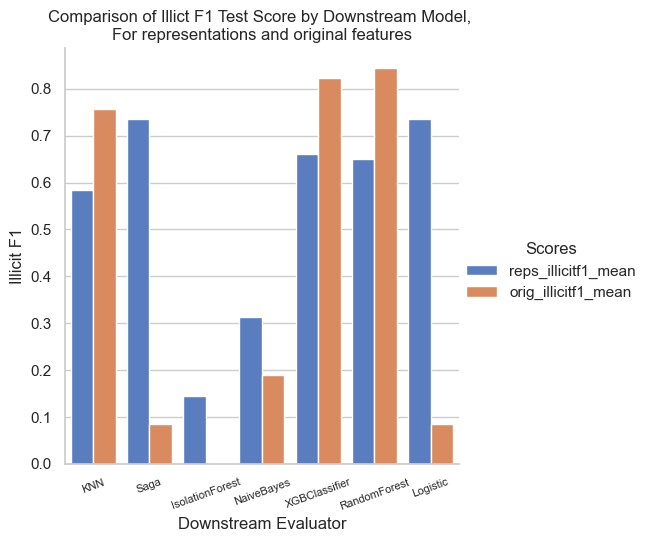

In [5]:
data=df[['downstream_model','reps_illicitf1_mean' ,  "orig_illicitf1_mean"]].copy()
dfs1 = pd.melt(data, id_vars = "downstream_model")
dfs1 = dfs1.rename(columns={"variable": "Scores"})
##print(dfs1)




ax=sns.catplot(x = 'downstream_model', y='value', 
               hue = 'Scores',data=dfs1, kind='bar')



ax.set(xlabel='Downstream Evaluator',ylabel='Illicit F1')
plt.title('Comparison of Illict F1 Test Score by Downstream Model, \nFor representations and original features')
ax.set_xticklabels( rotation=20, fontsize=8)
